# Introduction to Machine Learning and Toolkit Exercises 

## Introduction

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called `Iris_Data.csv` found in the [data](../../data) directory.

In [4]:
from __future__ import print_function
import os
data_path = ['data']
print (data_path)

['data']


## Question 1

Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [5]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/Iris_Data.csv')

In [23]:
# The number of data points in the row
df.shape[0]

# The column names
print(df.columns.values)

# df.dtypes
df.dtypes

['sepal_length' 'sepal_width' 'petal_length' 'petal_width' 'species']


sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## Question 2

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter. 

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html).

In [37]:
df.species = df.species.apply(lambda x:x.replace('Iris-',''))
df.species[55:60]
df.groupby(['species']).size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

## Question 3

Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.

In [ ]:
#Student writes code here

In [38]:
# Counts the number of items in the species
df.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

## Question 4

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for a hint.

In [39]:
# The mean calculation
df.groupby(['species']).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [40]:
# The median calculation
df.groupby(['species']).median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [41]:
# applying multiple functions at once - 2 methods
df.groupby(['species']).agg([np.mean, np.median])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

## Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

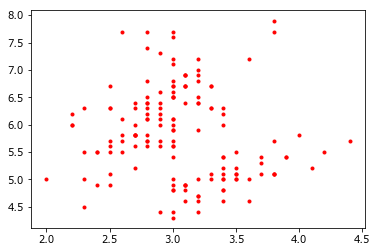

In [49]:
# A simple scatter plot with Matplotlib
plt.scatter(df.sepal_width, df.sepal_length, marker='.',color='red')

## Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate. 

In [ ]:
#Student writes code here

<BarContainer object of 100 artists>

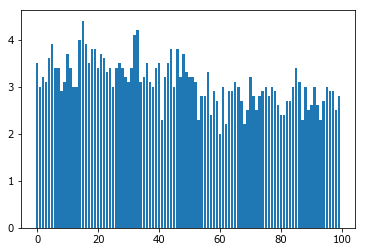

In [71]:
fig, ax = plt.subplots()
ax.bar(np.arange(100), df.sepal_width.iloc[:100])

## Question 7

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

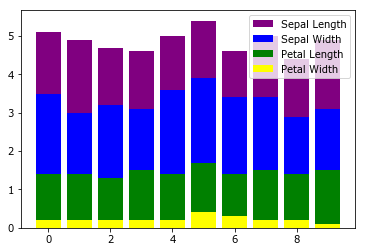

In [279]:
# Stacked and overlayed histograms

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(np.arange(10),df.sepal_length[:10],color='purple')
ax.bar(np.arange(10),df.sepal_width[:10],color='blue')
ax.bar(np.arange(10),df.petal_length[:10],color='green')
ax.bar(np.arange(10),df.petal_width[:10],color='yellow')
ax.legend(['Sepal Length','Sepal Width','Petal Length','Petal Width'])

<BarContainer object of 10 artists>

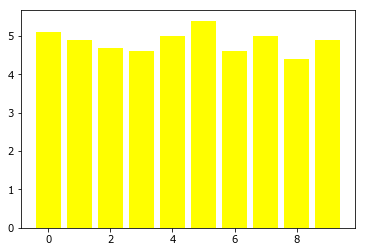

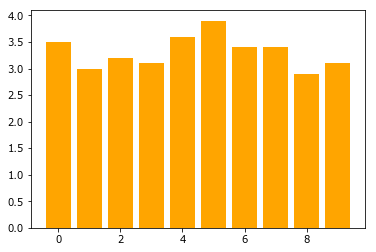

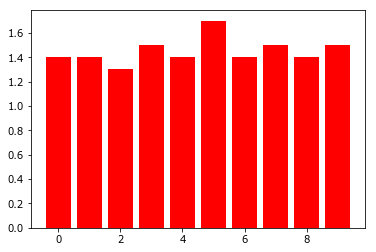

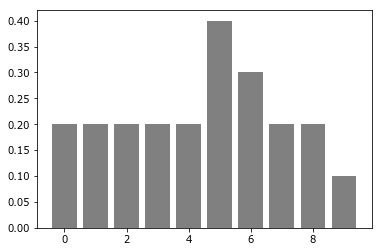

In [280]:
# Creating 4 histograms for each

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(np.arange(10),df.sepal_length[:10],color='yellow')

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.bar(np.arange(10),df.sepal_width[:10],color='orange')

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.bar(np.arange(10),df.petal_length[:10],color='red')

fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.bar(np.arange(10),df.petal_width[:10],color='gray')

## Question 8

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

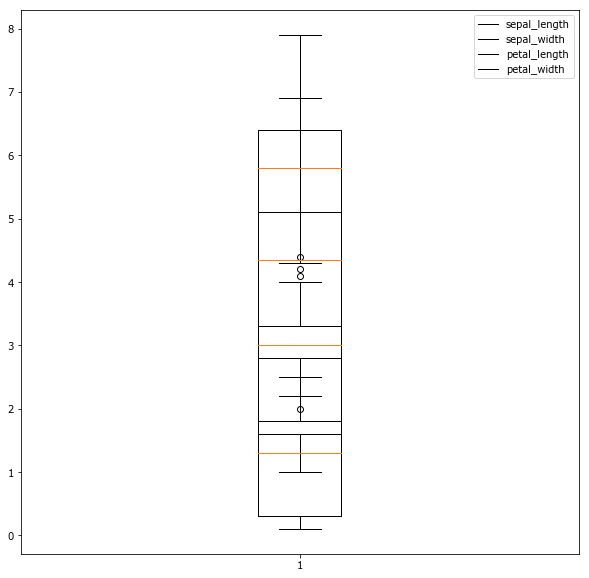

In [137]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.boxplot(df.sepal_length)
ax.boxplot(df.sepal_width)
ax.boxplot(df.petal_length)
ax.boxplot(df.petal_width)
ax.legend(['sepal_length','sepal_width','petal_length','petal_width'])

## Question 9

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

*Hint:* you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

In [264]:
# First we have to reshape the data so there is 
# only a single measurement in each column
import seaborn as sns

plot_data = (df
            .set_index('species')
            .stack()
            .to_frame()
            .reset_index()
            .rename(columns={0:'size', 'level_1':'measurement'}))

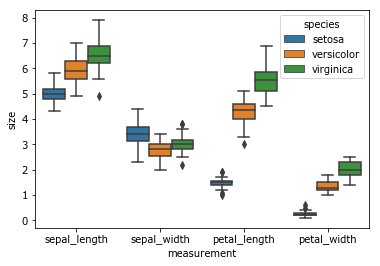

In [275]:
# Now plot the dataframe from above using Seaborn
plot_data
sns.boxplot(x='measurement',y='size',hue='species',data=plot_data)

## Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


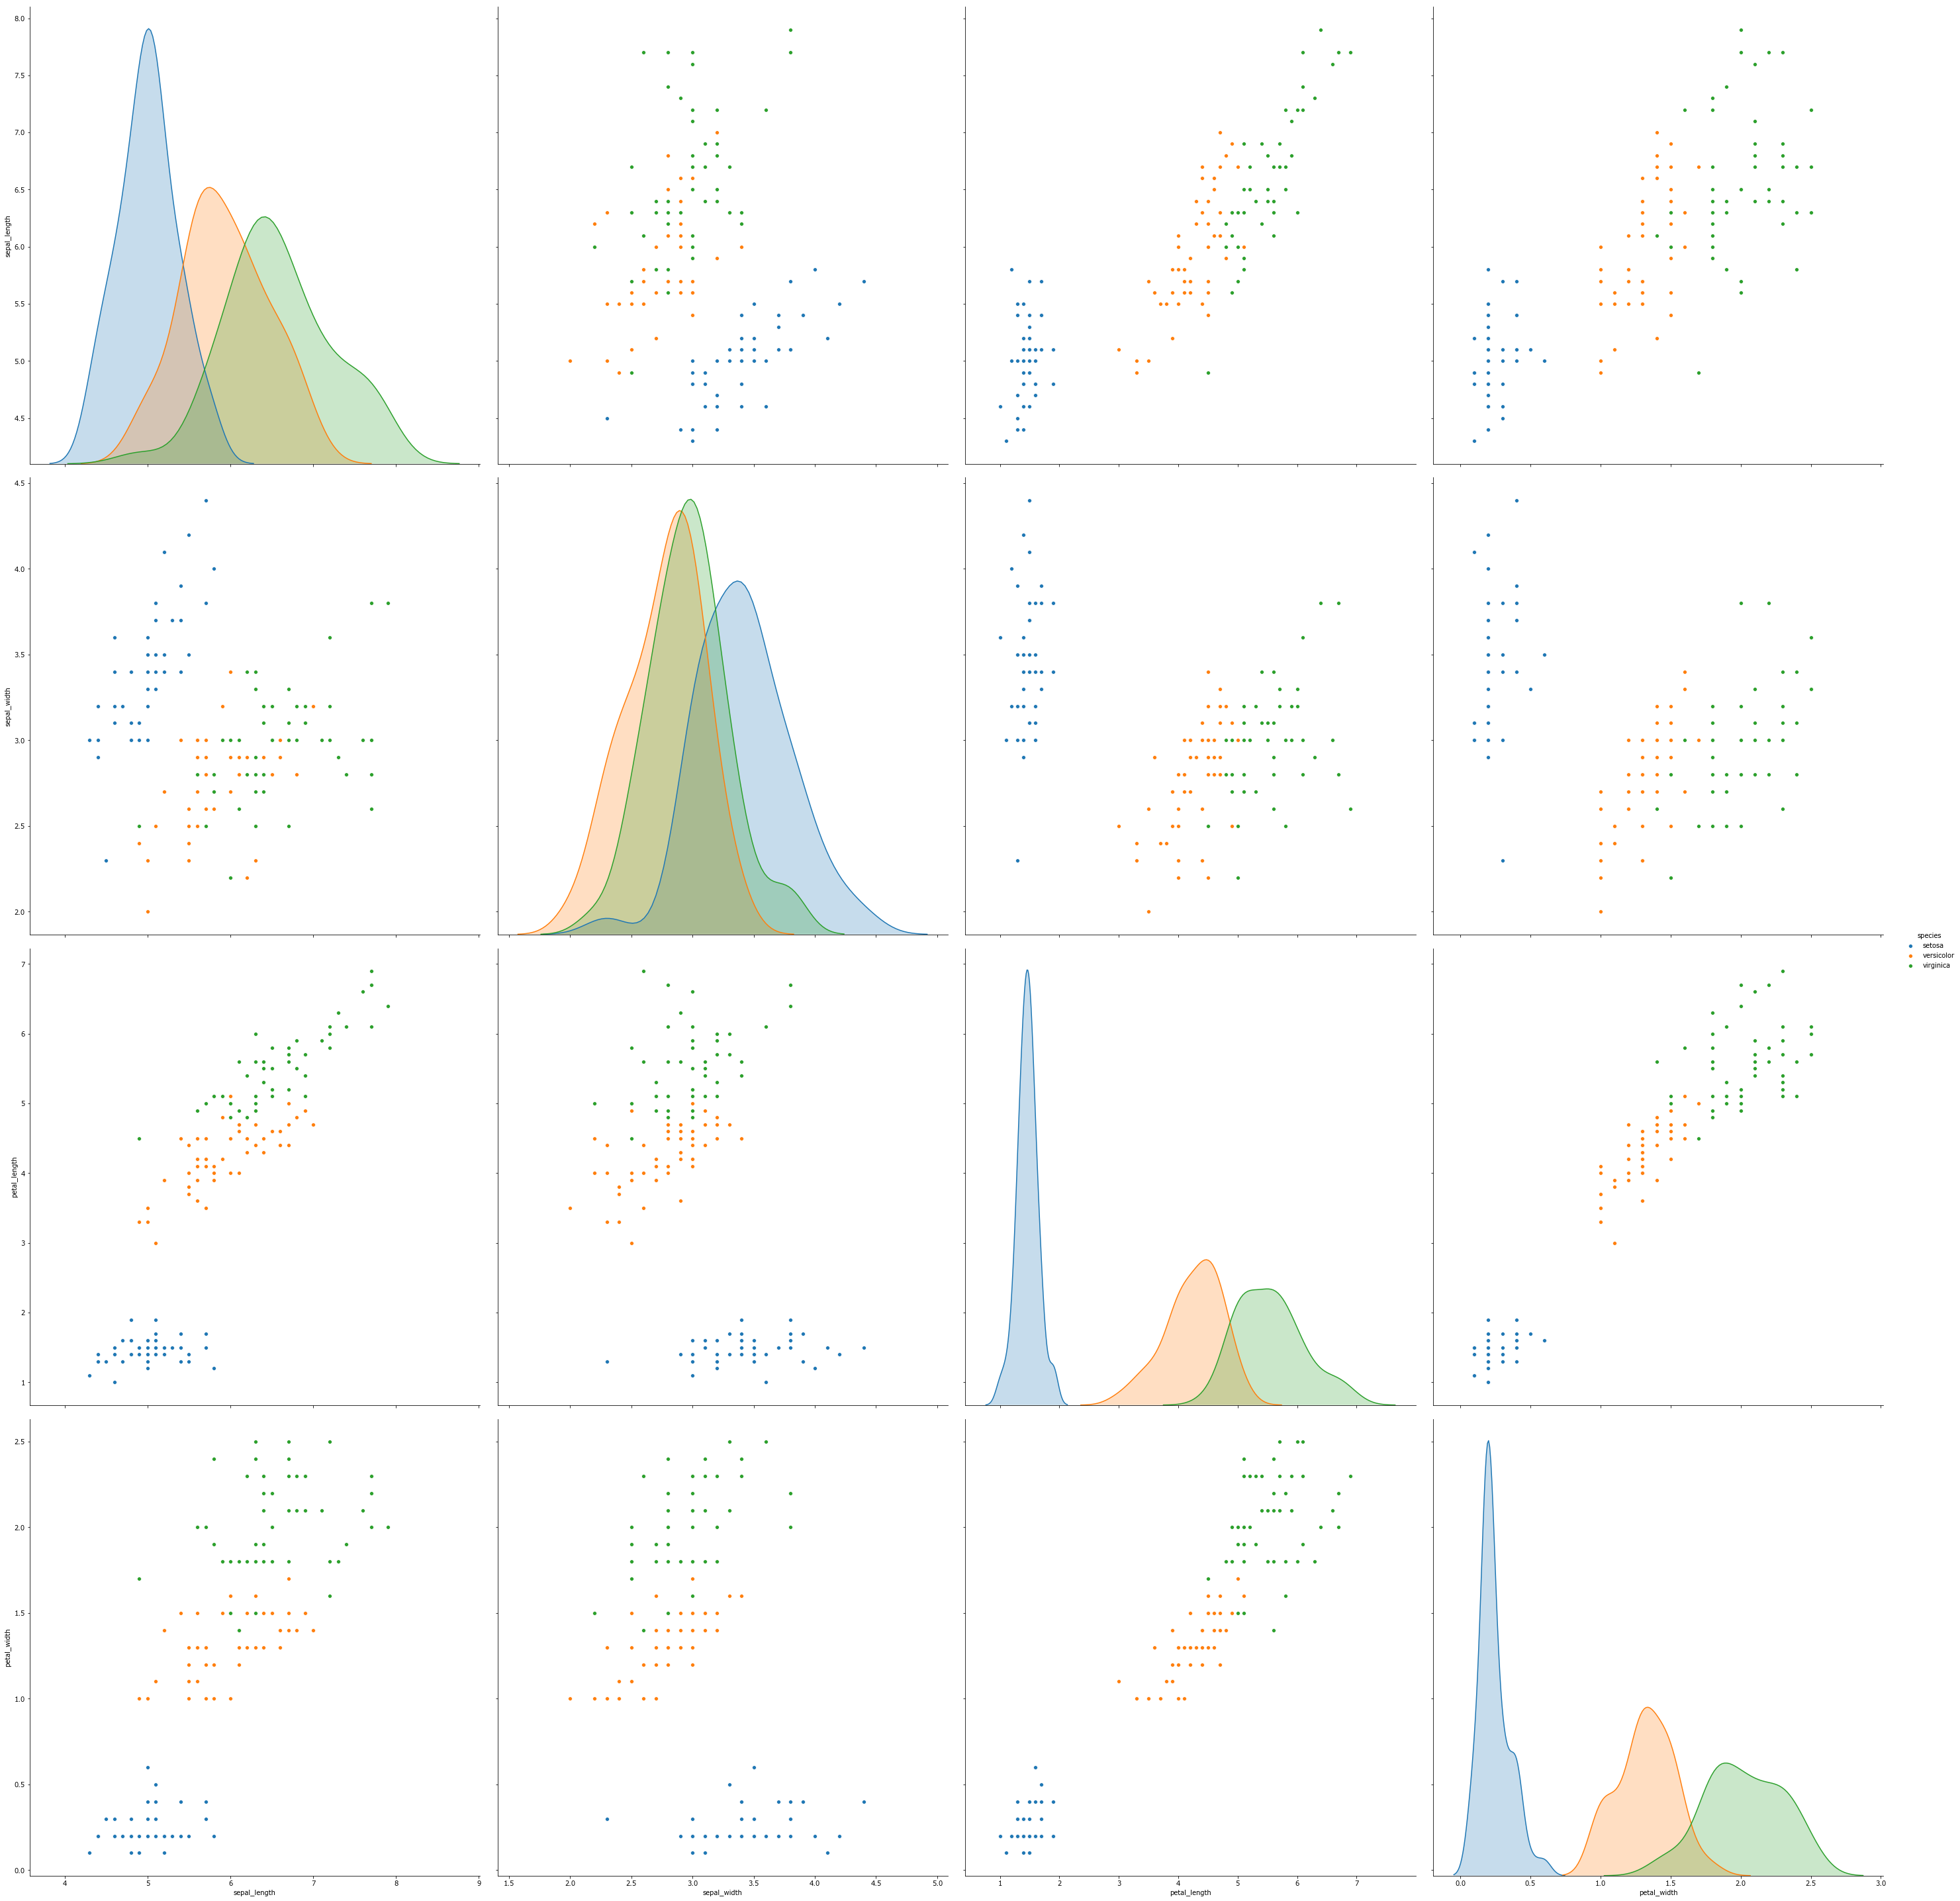

In [142]:
#Student writes code here
sns.pairplot(df, hue='species',size=10)